<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/linear_regression_2_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Toy Example 1

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?y=x^2"/>  
<img src="https://latex.codecogs.com/svg.latex?\frac{dy}{dx}=2x"/>

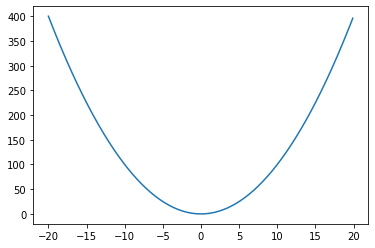

In [ ]:
x = np.arange(-20, 20, 0.1)
y = x ** 2
y_der = 2 * x
plt.plot(x, y)

In [ ]:
x_GD = -20
alpha = 0.1

der = 2 * x_GD
x_GD = x_GD - alpha * der
print(x_GD)

-16.0


In [ ]:
x_GD = 20
alpha = 0.1

# 10 times update the output
for i in range(10):
    der = 2 * x_GD
    x_GD = x_GD - alpha * der
    print(x_GD)

16.0
12.8
10.24
8.192
6.5536
5.24288
4.194304000000001
3.3554432000000007
2.6843545600000005
2.1474836480000006


-4.0740719526689756e-09


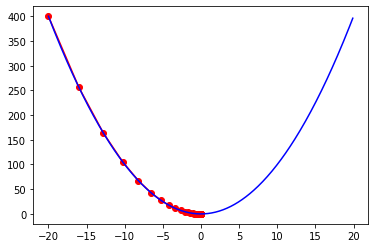

In [ ]:
x_GD = [-20]
alpha = 0.1

for i in range(100):
    der = 2 * x_GD[-1]
    x_GD.append(x_GD[-1] - alpha * der)

# for plotting we need the np array
x_GD = np.array(x_GD)
y_GD = x_GD ** 2
plt.plot(x_GD, y_GD, 'r-o')
plt.plot(x, y, 'b-')
print(x_GD[-1])

-16.371336093768566


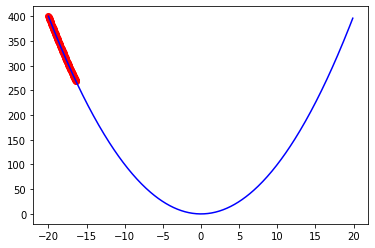

In [ ]:
x_GD = [-20]
alpha = 0.001

for i in range(100):
    der = 2 * x_GD[-1]
    x_GD.append(x_GD[-1] - alpha * der)

# for plotting we need the np array
x_GD = np.array(x_GD)
y_GD = x_GD ** 2
plt.plot(x_GD, y_GD, 'r-o')
plt.plot(x, y, 'b-')
print(x_GD[-1])

-1.3066372470001557e-21


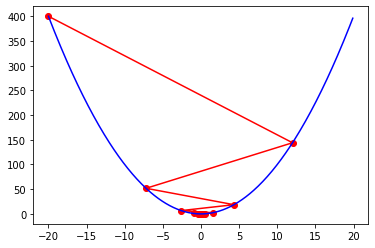

In [ ]:
x_GD = [-20]
alpha = 0.8

for i in range(100):
    der = 2 * x_GD[-1]
    x_GD.append(x_GD[-1] - alpha * der)

# for plotting we need the np array
x_GD = np.array(x_GD)
y_GD = x_GD ** 2
plt.plot(x_GD, y_GD, 'r-o')
plt.plot(x, y, 'b-')
print(x_GD[-1])

Text(0.5, 0, 'alpha')

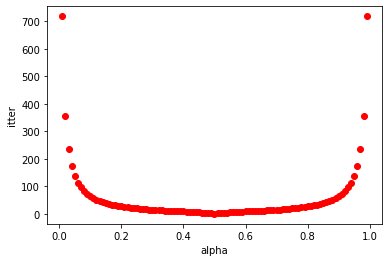

In [ ]:
'''
alpha has th eoptimum value

with each alpha with what amount of iteration it can get into the answer
we define two states as answer
1. we know that min=0 > when |x_gd|<thresold
2. x_gd diverges a lot - more than a threshold
'''
for alpha in np.arange(0.01, 1, 0.01):
    x_GD = 20
    for i in range(10000):
        der = 2 * x_GD
        x_GD = x_GD - alpha * der
        # find the answer
        if np.abs(x_GD) < 1e-5:
            break
        # do not overflow
        if x_GD > 10000:
            i = 10000
            break
    plt.plot(alpha, i, 'ro')
plt.ylabel('itter')
plt.xlabel('alpha')

# Toy Example 2

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?y=-\frac{sin(x)}{x}"/>  
<img src="https://latex.codecogs.com/svg.latex?\frac{dy}{dx}=\frac{sin(x)-xcos(x)}{x^2}"/>

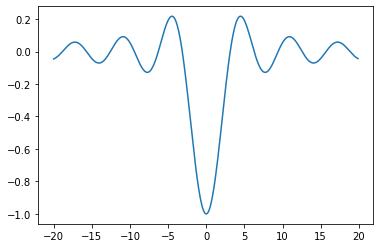

In [ ]:
x = np.arange(-20, 20, 0.1)
y = -np.sin(x) / x
plt.plot(x, y)

13.990512185030301


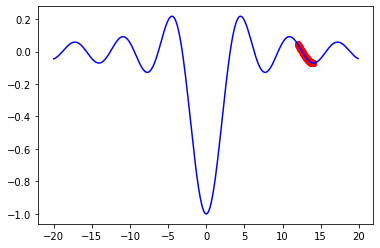

In [ ]:
# stocks in the local minimum
x_GD = [12]
alpha = 0.5

for i in range(100):
    der = (np.sin(x_GD[-1]) - x_GD[-1] * np.cos(x_GD[-1])) / (x_GD[-1] ** 2)
    x_GD.append(x_GD[-1] - alpha * der)

x_GD = np.array(x_GD)
y_GD = -np.sin(x_GD) / x_GD
plt.plot(x_GD, y_GD, 'r-o')
plt.plot(x, y, 'b-')
print(x_GD[-1])

# Toy Example 3

MAE Function  

we want to find minimum of:   
<img src="https://latex.codecogs.com/svg.latex?y=|x|"/>  
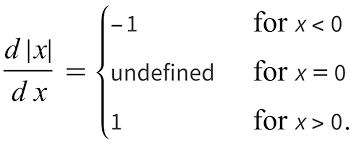

In [ ]:
class GD_abs:
    def call(self, x):
        return np.abs(x)
    
    def get_derivatives(self, x):
        return np.sign(x)

In [ ]:
def optimize(function, x0, alpha, itterations):
    x_GD = [x0]

    for i in range(itterations):
        der = function.get_derivatives(x_GD[-1])
        x_GD.append(x_GD[-1] - alpha * der)
    return np.array(x_GD)

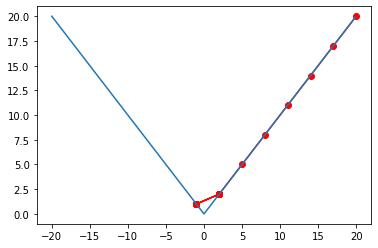

In [ ]:
function = GD_abs()

x_GD = optimize(function, 20, 3, 1000)
y_GD = function.call(x_GD)
plt.plot(x_GD, y_GD, 'r-o')

x = np.arange(-20, 20, 0.1)
y = function.call(x)
plt.plot(x, y)

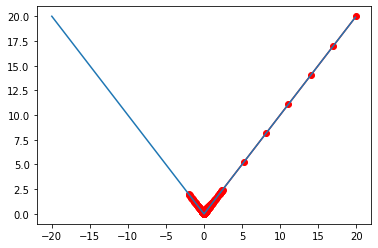

In [28]:
'''
What we used is based on MAE > using MAE means same steps of reducing the gd
some times leads to divergent
so we have to manually reduce the alpha in order to prevent of having same steps
but in MSE > this reduction happends automatically
'''
def optimize1(function, x0, alpha, itterations):
    x_GD = [x0]

    for i in range(itterations):
        der = function.get_derivatives(x_GD[-1])
        x_GD.append(x_GD[-1] - alpha * der)
        alpha = alpha*0.99
    return np.array(x_GD)


function = GD_abs()

x_GD = optimize1(function, 20, 3, 1000)
y_GD = function.call(x_GD)
plt.plot(x_GD, y_GD, 'r-o')

x = np.arange(-20, 20, 0.1)
y = function.call(x)
plt.plot(x, y)

# Toy Example 3

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?y=-e^{-|x|}"/>  
<img src="https://latex.codecogs.com/svg.latex?\frac{dy}{dx}=\frac{xe^{-|x|}}{|x|}"/>

In [29]:
class GD_exp:
    def __call__(self, x):
        return -np.exp(-np.abs(x))
    
    def get_derivatives(self, x):
        return x * np.exp(-np.abs(x)) / np.abs(x)

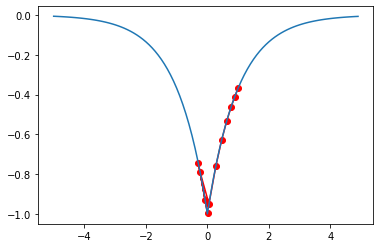

In [30]:
function = GD_exp()

x_GD = optimize(function, 1, 0.3, 10)
y_GD = function(x_GD)
plt.plot(x_GD, y_GD, 'r-o')

x = np.arange(-5, 5, 0.1)
y = function(x)
plt.plot(x, y)

# Toy Example 4

https://latex.codecogs.com/eqneditor/editor.php  

we want to find minimum of:
<img src="https://latex.codecogs.com/svg.latex?z=ax^2 + by^2"/>  
<img src="https://latex.codecogs.com/gif.latex?%5Cdpi%7B150%7D%20%5Cleft%5C%7B%5Cbegin%7Bmatrix%7D%5Cfrac%7B%5Cpartial%20z%7D%7B%5Cpartial%20x%7D%20%3D%202ax%5C%5C%5Cfrac%7B%5Cpartial%20z%7D%7B%5Cpartial%20y%7D%20%3D%202ay%5Cend%7Bmatrix%7D%5Cright."/>

In [35]:
class GD_quadratic:
    def __init__(self, a=1, b=1):
        self.a = a
        self.b = b
        
    def __call__(self, x, y):
        return (self.a * (x ** 2)) + (self.b * (y ** 2))
    
    def get_derivatives(self, x, y):
        # the return is 2D > we have 2 params
        return [2 * self.a * x, 2 * self.b *  y]

In [47]:
def optimize_3d(function, x0, y0, alpha, itterations):
    points_GD = [(x0, y0)]

    for i in range(itterations):
        der_x, der_y = function.get_derivatives(points_GD[-1][0], points_GD[-1][1])
        
        new_x = points_GD[-1][0] - alpha * der_x
        new_y = points_GD[-1][1] - alpha * der_y

        alpha = alpha * 0.99
        
        points_GD.append((new_x, new_y))
        
    return np.array(points_GD)

In [55]:
x = [1,2,3]
y = [4,5,6]

# makes the x and y dependent to each other
x,y = np.meshgrid(x,y)
print(x.shape, y.shape)
x,y

(3, 3) (3, 3)


(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]), array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]))

'\nupadate in each point is always perpendicular to the contour curve\nif the curve is too much > we have swing\nin x axis we are going to min\nin y axis we have tolerance\nit is something that happens in the ml algo > shows that LR is high\n'

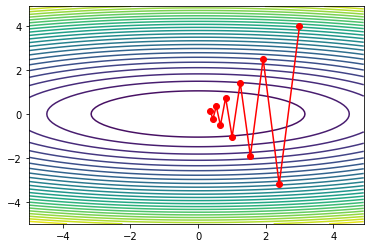

In [52]:
function = GD_quadratic(1, 9)

points_GD = optimize_3d(function, 3, 4, 0.1, 10)

# this is 3D > u can't plot easily > x axis is all x and y is too > we don't have z
plt.plot(points_GD[:, 0], points_GD[:, 1], 'ro-')

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(x, y)
# for having z we have to make the x and y dependent to fill all of the page
z = function(x, y)
# level defines how many contours 
plt.contour(x, y, z, levels=30)

'''
upadate in each point is always perpendicular to the contour curve
if the curve is too much > we have swing
in x axis we are going to min
in y axis we have oscillation
it is something that happens in the ml algo > shows that LR is high
'''

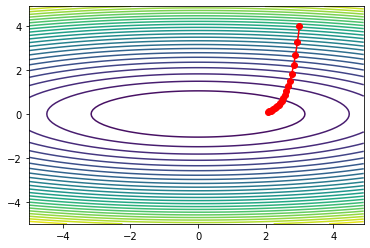

In [54]:
points_GD = optimize_3d(function, 3, 4, 0.01, 20)

# this is 3D > u can't plot easily > x axis is all x and y is too > we don't have z
plt.plot(points_GD[:, 0], points_GD[:, 1], 'ro-')

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(x, y)
# for having z we have to make the x and y dependent to fill all of the page
z = function(x, y)
# level defines how many contours 
plt.contour(x, y, z, levels=30)

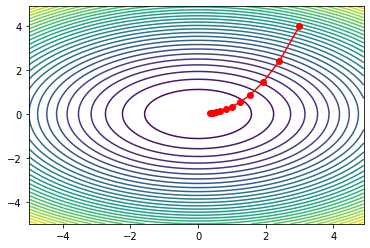

In [50]:
function = GD_quadratic(1, 2)
# not too much curved > both a and y goting to their min

points_GD = optimize_3d(function, 3, 4, 0.1, 10)

# this is 3D > u can't plot easily > x axis is all x and y is too > we don't have z
plt.plot(points_GD[:, 0], points_GD[:, 1], 'ro-')

x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
x, y = np.meshgrid(x, y)
# for having z we have to make the x and y dependent to fill all of the page
z = function(x, y)
# level defines how many contours 
plt.contour(x, y, z, levels=30)